Apply the logistic regression (linear classifier) algorithm discussed in the lab session to predict next-day rain based on the 10 years of daily weather observations from many locations within a country. The dataset contains many factors taken into consideration to specify whether it rained or not on that particular day. The training and testing dataset is provided in the files titled ‘weather_train.csv’ and ‘weather_test.csv’, respectively. Carry out the following tasks as assignment problems:

1. Inspect and plot some portion of the training data using pandas. Segregate the training and testing data into two separate variables consisting of ‘feature values’ and corresponding ‘predictions’ (the prediction column is titled ‘RainTomorrow’ in the dataset). To simplify the problem a bit, clean the whole data by carrying out the following sub-tasks:
    - Convert the predictions in the binary format by using ‘1’ for ‘YES’ and ‘0’ for ‘NO’.
    - Identify and drop the feature columns having datatype ‘object’.
    - Identify cells having ‘NaN’ or ‘NA’ values and replace them with mean values of their respective columns.
    - Normalize all the feature values by scaling them between 0 and 1. The values in feature matrix $X$ can be normalized as:
   $$
   X_{norm} = \frac{X - min(X)}{max(X) - min(X)}
   $$
Execute the above sub-tasks and display some portion of the data and its head after each data cleaning step.
plt.plot(cost, label='Cost')
2. Classify the cleaned dataset using binary classification algorithm discussed in the class and calculate the optimized weights and training set accuracy for the model (use Truncated Newton’s Method in SciPy for optimization).
3. Plot the cost history ($J$) vs. the number of iterations
4. Apply the trained model on the cleaned test dataset to predict the testing accuracy of the model.

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt

In [363]:
DIR = 'Data'
SAVE_DIR = 'Images'

In [364]:
df_train = pd.read_csv(os.path.join(DIR,"weather_train.csv"))
df_test = pd.read_csv(os.path.join(DIR,"weather_test.csv"))
print("The shape of the training data is: ",df_train.shape)
print("The shape of the testing data is: ",df_test.shape)

The shape of the training data is:  (52062, 23)
The shape of the testing data is:  (29093, 23)


In [366]:
df_train.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

## Statement 1.
 Inspect and plot some portion of the training data using pandas. Segregate the training and testing data into two separate variables consisting of ‘feature values’ and corresponding ‘predictions’ (the prediction column is titled ‘RainTomorrow’ in the dataset). To simplify the problem a bit, clean the whole data by carrying out the following sub-tasks:
    - Convert the predictions in the binary format by using ‘1’ for ‘YES’ and ‘0’ for ‘NO’.
    - Identify and drop the feature columns having datatype ‘object’.
    - Identify cells having ‘NaN’ or ‘NA’ values and replace them with mean values of their respective columns.
    - Normalize all the feature values by scaling them between 0 and 1. The values in feature matrix $X$ can be normalized as:
   $$
   X_{norm} = \frac{X - min(X)}{max(X) - min(X)}
   $$

- Segregate the training and testing data into two separate variables consisting of ‘feature values’ and corresponding ‘predictions’ (the prediction column is titled ‘RainTomorrow’ in the dataset).

In [367]:
X_train = df_train.drop(['RainTomorrow'],axis=1)
y_train = df_train['RainTomorrow']
X_test = df_test.drop(['RainTomorrow'],axis=1)
y_test = df_test['RainTomorrow']
print("The shape of the training data is: ",X_train.shape)
print("The shape of the testing data is: ",X_test.shape)

The shape of the training data is:  (52062, 22)
The shape of the testing data is:  (29093, 22)


- Convert the predictions in the binary format by using ‘1’ for ‘YES’ and ‘0’ for ‘NO’.

In [369]:
y_train.isna().sum(),y_test.isna().sum()

(0, 408)

In [370]:
y_test.fillna('No',inplace=True)

In [371]:
y_train = y_train.replace(['No','Yes'],[0,1])
y_test = y_test.replace(['No','Yes'],[0,1])
y_train.value_counts()

0    39519
1    12543
Name: RainTomorrow, dtype: int64

In [373]:
y_test.value_counts()

0    23305
1     5788
Name: RainTomorrow, dtype: int64

- Identify and drop the feature columns having datatype ‘object’.

In [374]:
X_train_ob_col= X_train.select_dtypes(include='object').columns
print("The object columns are: ",X_train_ob_col)

The object columns are:  Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')


In [375]:
X_train = X_train.drop(X_train_ob_col,axis=1)
X_test = X_test.drop(X_train_ob_col,axis=1)

In [376]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

- Identify cells having ‘NaN’ or ‘NA’ values and replace them with mean values of their respective columns.

In [377]:
X_train.isna().sum()

MinTemp            524
MaxTemp            390
Rainfall          1296
Evaporation      28015
Sunshine         33621
WindGustSpeed     5522
WindSpeed9am      1132
WindSpeed3pm      1756
Humidity9am        790
Humidity3pm       1395
Pressure9am       6995
Pressure3pm       6945
Cloud9am         22448
Cloud3pm         22886
Temp9am            509
Temp3pm           1156
dtype: int64

Filling null value with mean value of the column

In [378]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [337]:
X_train.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

- Normalize all the feature values by scaling them between 0 and 1. The values in feature matrix $X$ can be normalized as:
   $$
   X_{norm} = \frac{X - min(X)}{max(X) - min(X)}
   $$

In [379]:
def mean_normalize(df,cols):
    for col in cols:
        df[col] = (df[col] - df[col].mean())/(df[col].max()-df[col].min())
    return df

In [380]:
X_train_final = mean_normalize(X_train,X_train.columns)
X_test_final=mean_normalize(X_test,X_train.columns)

In [381]:
y_train_final = y_train
y_test_final = y_test

- Execute the above sub-tasks and display some portion of the data and its head after each data cleaning step.

In [382]:
X_train_final.head(5).T

,0,1,2,3,4
MinTemp,2.527735e-02,-1.330340e-01,1.208474e-02,-8.554059e-02,1.334568e-01
MaxTemp,-1.060367e-02,3.861333e-02,5.203615e-02,1.034903e-01,1.996872e-01
Rainfall,-5.501055e-03,-7.118306e-03,-7.118306e-03,-7.118306e-03,-4.422888e-03
Evaporation,6.125368e-18,6.125368e-18,6.125368e-18,6.125368e-18,6.125368e-18
Sunshine,-6.299138e-17,-6.299138e-17,-6.299138e-17,-6.299138e-17,-6.299138e-17
WindGustSpeed,4.033023e-02,4.033023e-02,5.595523e-02,-1.159198e-01,1.689273e-02
WindSpeed9am,5.620610e-02,-6.687082e-02,4.851380e-02,-1.302466e-02,-4.379390e-02
WindSpeed3pm,7.399343e-02,4.989704e-02,9.808981e-02,-1.067295e-01,2.580065e-02
Humidity9am,7.814197e-03,-2.705363e-01,-3.323920e-01,-2.602270e-01,1.212163e-01
Humidity3pm,-3.028706e-01,-2.725676e-01,-2.220625e-01,-3.634767e-01,-1.917595e-01


In [383]:
X_test_final.head(5).T

,0,1,2,3,4
MinTemp,1.630993e-01,4.982641e-01,0.171341,0.025737,-0.009978
MaxTemp,4.898495e-01,4.847604e-01,0.128526,0.113259,0.067458
Rainfall,-5.785526e-03,-5.785526e-03,-0.005786,-0.005786,-0.005786
Evaporation,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
Sunshine,3.293823e-01,2.660020e-01,0.068819,0.329382,0.280087
WindGustSpeed,1.093879e-01,1.093879e-01,0.044872,0.028743,0.077130
WindSpeed9am,1.860518e-01,2.654169e-01,0.122560,0.043195,-0.052043
WindSpeed3pm,-4.746269e-02,1.906326e-01,0.158887,0.190633,0.206506
Humidity9am,-3.629221e-01,-5.346393e-01,0.000714,-0.201306,-0.150801
Humidity3pm,-3.651574e-01,-2.439453e-01,-0.031824,-0.173238,-0.122733


## Statement 2.
Classify the cleaned dataset using binary classification algorithm discussed in the class and calculate the optimized weights and training set accuracy for the model (use Truncated Newton’s Method in SciPy for optimization).

In [388]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [398]:
def prediction(w,X):
    m = X.shape[0]
    X = np.c_[np.ones(m), X ]
    y_hat = sigmoid(np.dot(X, w))
    y_hat = np.where(y_hat > 0.5, 1, 0)
    return y_hat

In [392]:
def accuracy(y,y_pred):
    return np.mean(y == y_pred)

In [393]:
def costFunction(w, X, y):
    m = len(y)
    X = np.c_[np.ones(m), X ]
    y_hat = sigmoid(np.dot(X, w))
    J = -1/m * (np.log(y_hat).T.dot(y) + np.log(1-y_hat).T.dot(1-y))
    return J

In [396]:
cost=[]
acc =[]
def callback(w):
    cost.append(costFunction(w, X_train_final.values, y_train_final.values))
    y_pred = prediction(w, X_train_final.values)
    acc.append(accuracy(y_train_final.values,y_pred))

In [399]:
w = np.zeros(X_train_final.shape[1]+1) #initialization (w)
args = (X_train_final.values, y_train_final.values) #arguments
result = opt.minimize(costFunction, x0=w, args=args, method='TNC', tol=1e-10, callback=callback)

In [412]:
acc

[0.7590757174138527,
 0.7590757174138527,
 0.7691022242710615,
 0.7726748876339748,
 0.8045791556221429,
 0.8070761784026738,
 0.807402712150897,
 0.8085743920709922,
 0.8101878529445661,
 0.8127232914601821,
 0.8132226960162883,
 0.8141062579232453,
 0.8142215051285007,
 0.8145480388767239,
 0.8145480388767239,
 0.8149321962275748,
 0.8154508086512235,
 0.8153163535784257,
 0.8152395221082556,
 0.8158925896047021,
 0.8160462525450425,
 0.8163151626906381,
 0.817121893127425,
 0.8181591179747224]

In [401]:
cost

[0.5428211966912712,
 0.5428211966912712,
 0.5409022374803117,
 0.5103331462087789,
 0.48432047937203865,
 0.4377108635915166,
 0.43440607842765466,
 0.4331875884759179,
 0.4310658844447352,
 0.42368660701997873,
 0.4223044330520839,
 0.42200181906122847,
 0.4214650686830703,
 0.42126244532670565,
 0.42081073618827225,
 0.4206435837284143,
 0.4205311061220818,
 0.4204687577409119,
 0.4203821100483185,
 0.4201328058476083,
 0.41976226252524595,
 0.41964389491633264,
 0.4192301199143825,
 0.41908833331989676,
 0.41834169382663516]

## Statement 3.
Plot the cost history ($J$) vs. the number of iterations

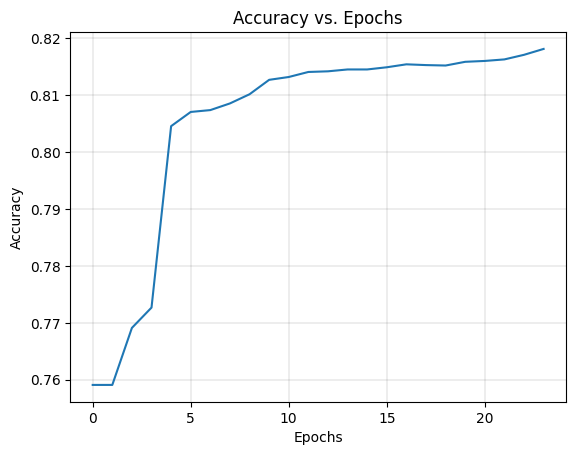

In [409]:
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy vs. Epochs')
plt.grid(True,color='k', linestyle='-', linewidth=0.1)
plt.savefig(os.path.join(SAVE_DIR,'0302.png'))


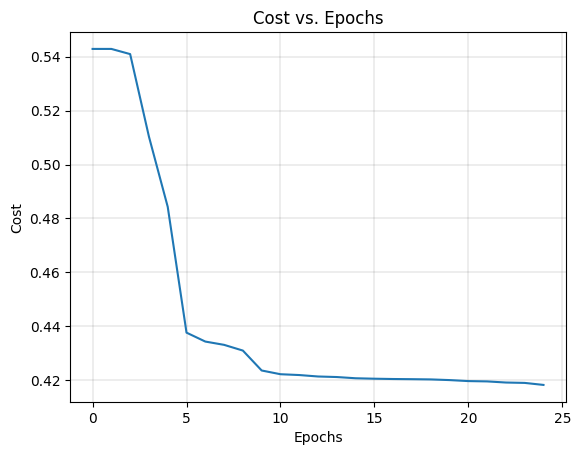

In [410]:
plt.plot(cost)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost vs. Epochs')
plt.grid(True,color='k', linestyle='-', linewidth=0.1)
plt.savefig(os.path.join(SAVE_DIR,'0301.png'))


## Statement 4.
Apply the trained model on the cleaned test dataset to predict the testing accuracy of the model.

In [404]:
w_optimize = result.x
w_optimize

array([-1.53220507,  0.7213525 , -0.02805842,  0.21761059, -0.07538577,
       -0.7629129 ,  4.0715458 , -0.38117347, -0.50923013,  0.28953795,
        4.26001448, -0.32218647, -1.2533293 ,  0.54327657,  0.78584005,
       -0.19053754, -0.50507275])

Prediction of test Data

In [405]:
y_pred=prediction(w_optimize,X_test_final.values)

In [407]:
y_pred.shape

(29093,)

In [408]:
accuracy(y_test_final.values,y_pred)

0.8604819028632317